In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv(r"D:\Datasets\ADV_house price pred\train.csv")

In [3]:
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Data Analysis We will Analyze To Find 
- Missing Values
- All The Numerical Variables 
- Distribution of the Numerical Variables
- Categorical Variables
- Cardinality of Categorical Variables
- Outliers
- Relationship between independent and dependent feature(SalePrice) 

<AxesSubplot:>

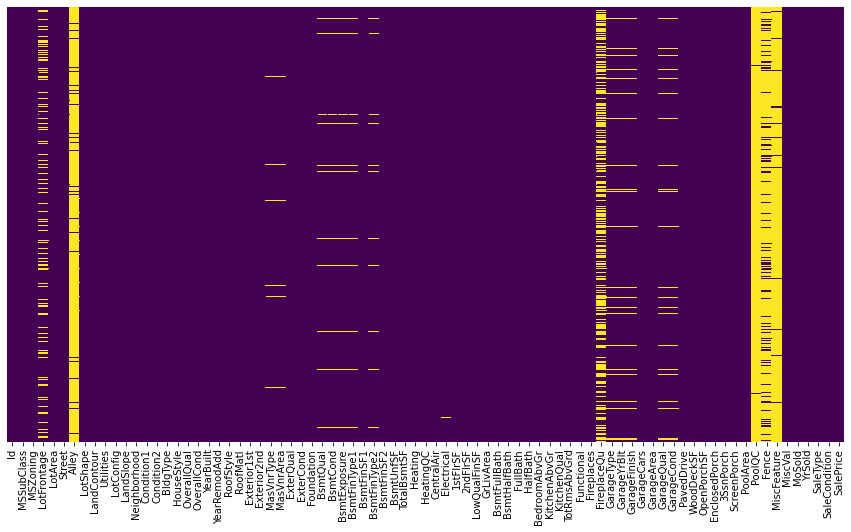

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)

 - Columns with High Missing Values :
    PoolQC;
    MiscFeature;
    Alley;
    Fence.
    
    

In [34]:
# Find the % of missing values in all columns
cols_na=[cols for cols in df.columns if df[cols].isnull().sum() > 1 ]
# calc the %
for i in cols_na:
    print(i,':',np.round(df[i].isnull().mean(),4)*100,'% of missing val')

LotFrontage : 17.740000000000002 % of missing val
Alley : 93.77 % of missing val
MasVnrType : 0.5499999999999999 % of missing val
MasVnrArea : 0.5499999999999999 % of missing val
BsmtQual : 2.53 % of missing val
BsmtCond : 2.53 % of missing val
BsmtExposure : 2.6 % of missing val
BsmtFinType1 : 2.53 % of missing val
BsmtFinType2 : 2.6 % of missing val
FireplaceQu : 47.260000000000005 % of missing val
GarageType : 5.55 % of missing val
GarageYrBlt : 5.55 % of missing val
GarageFinish : 5.55 % of missing val
GarageQual : 5.55 % of missing val
GarageCond : 5.55 % of missing val
PoolQC : 99.52 % of missing val
Fence : 80.75 % of missing val
MiscFeature : 96.3 % of missing val


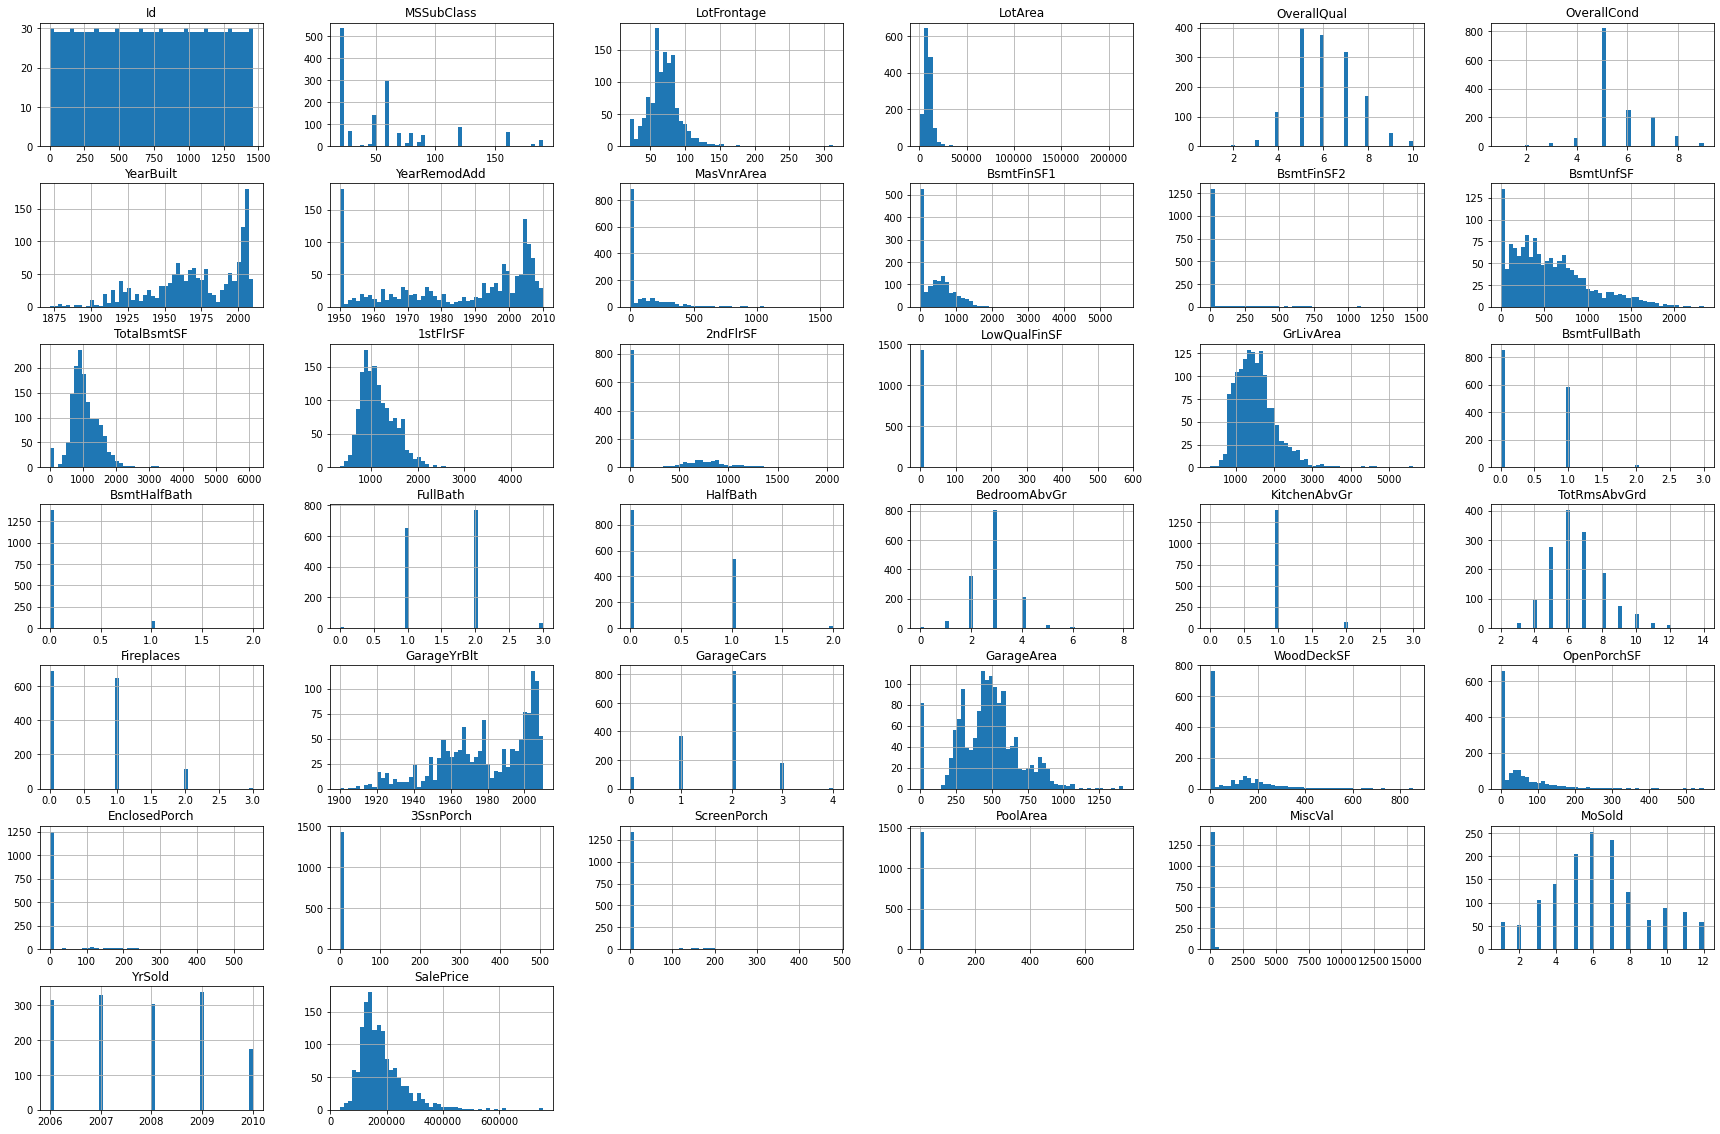

In [44]:
# Plot the train data to see its distribution as a whole 
df.hist(bins=50, figsize=(30,20))
plt.show()

# Check the dependency of Sales Price(target) on the Missing val

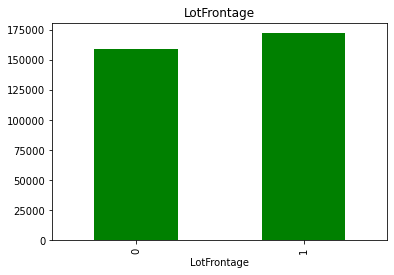

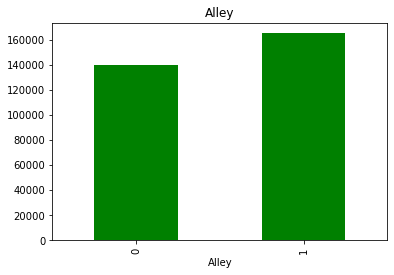

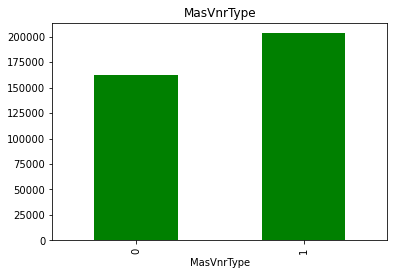

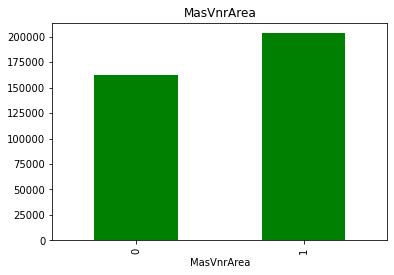

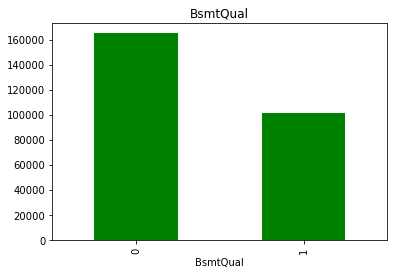

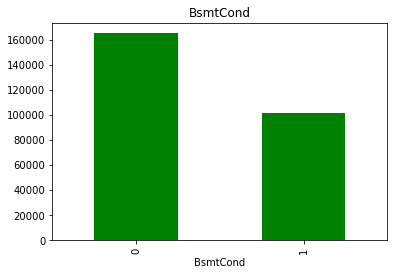

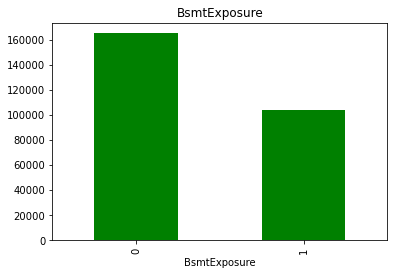

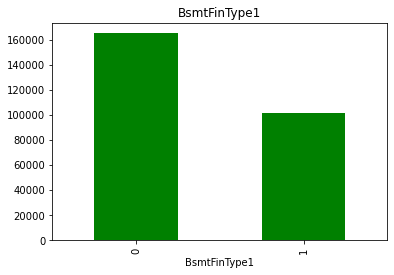

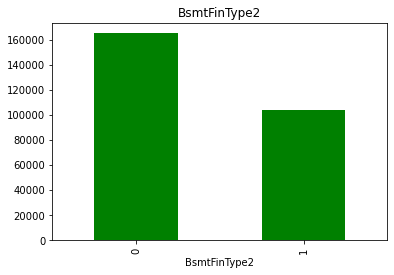

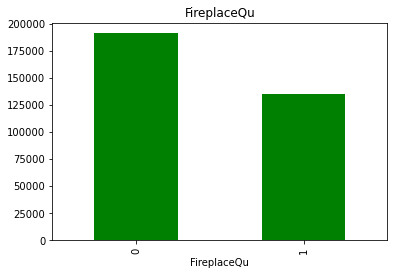

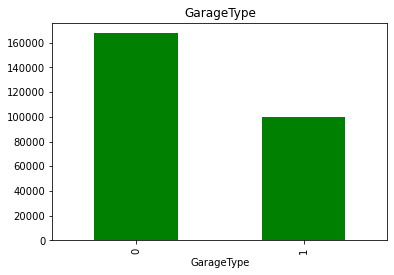

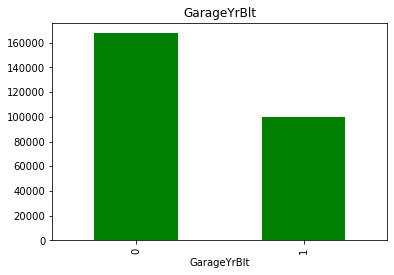

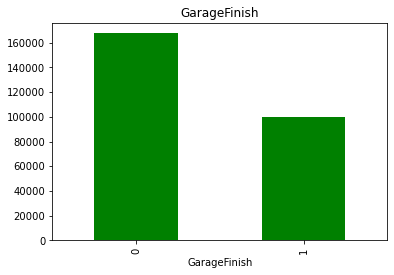

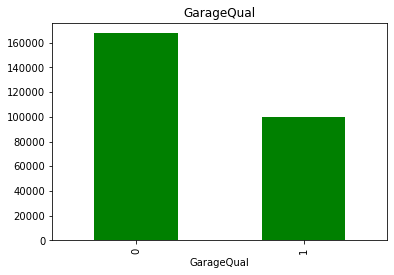

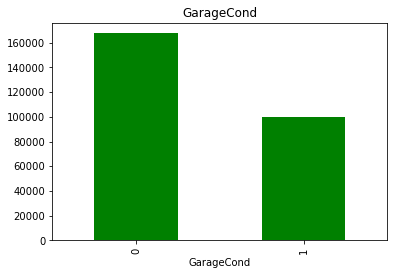

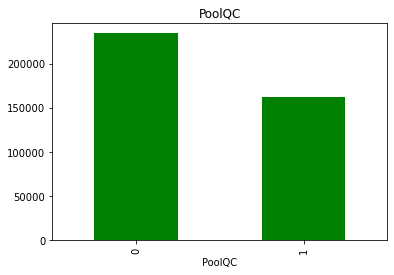

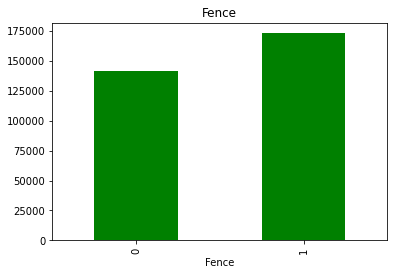

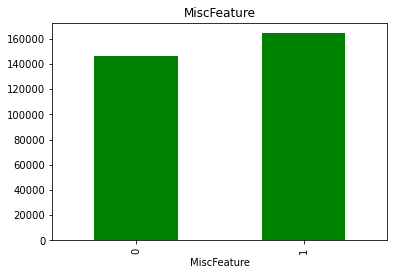

In [5]:
df1=df.copy()
#make a variable that indicates 1 if the observation was missing or zero otherwise
for i in cols_na:
    df1[i]=np.where(df1[i].isnull(),1,0)
#calc mean SalePrice where the information is missing or present
    df1.groupby(i)['SalePrice'].median().plot.bar(color='g')
    plt.title(i)
    plt.show()

 - Sales Price(target) has dependency on the Missing val(higher median price),so replace it appropriately 

# Find Numerical Variables

In [6]:
num_cols=[cols for cols in df.columns if df[cols].dtype !='O' ]

print('NO.of NUMERICAL_COLS =',len(num_cols))
df[num_cols].head()

NO.of NUMERICAL_COLS = 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [7]:
# Temporary variable-DateTime Variable
year_cols=[i for i in num_cols if 'Year'in i or 'Yr' in i]
year_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
#get unique vals of year_cols
for i in year_cols:
    print(i,df[i].unique(),'\n')

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905] 

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2

Text(0.5, 1.0, 'House Price vs YearSold')

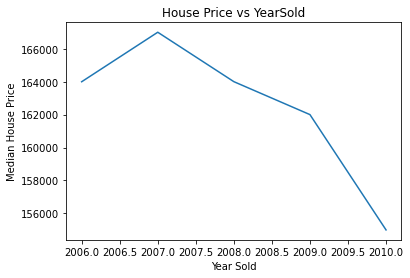

In [9]:
#check dependency of Salesprice and Yrsold
df.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")
# Since of Wall street crash the prices declined over the years

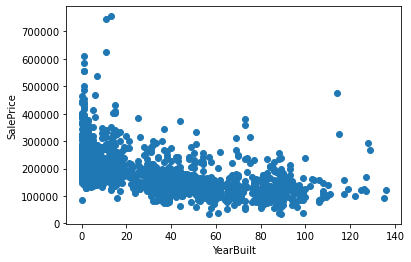

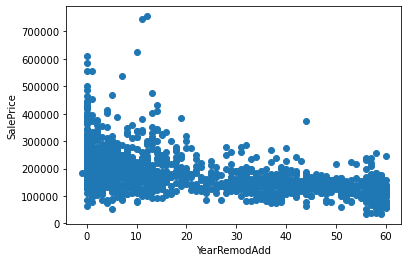

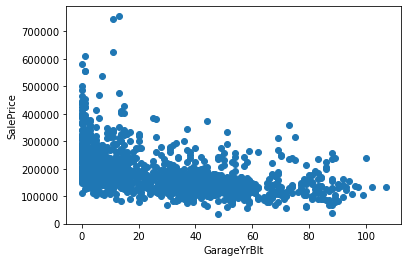

In [10]:
# check the realtionship btw SalePrice Vs year_cols
for i in year_cols:
       if i != 'YrSold':
        df1=df.copy()
        df1[i]=df1["YrSold"]-df1[i]
        plt.scatter(df1[i],df1['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalePrice')
        plt.show()

 - YearBuilt(high year val low prices&vice-versa)

In [11]:
# Find discrete var from num_cols with unique values <25
disc_cols=[i for i in num_cols if len(df[i].unique())<25 and i not in year_cols+['Id']]
print("No.of Discrete Variables: {}".format(len(disc_cols)))
print(disc_cols)

No.of Discrete Variables: 17
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [12]:
df[disc_cols].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


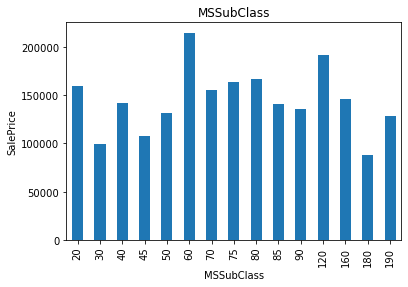

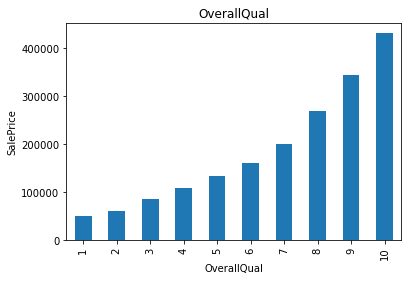

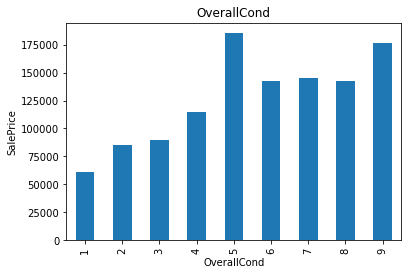

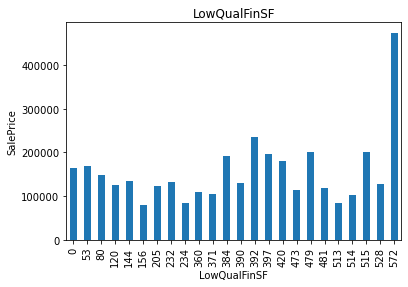

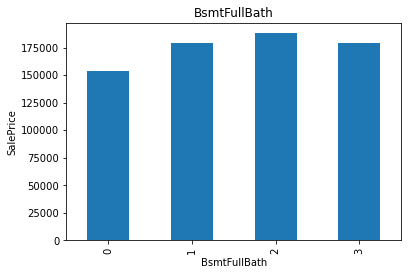

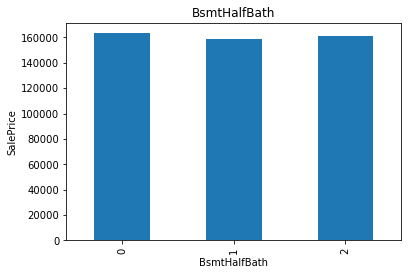

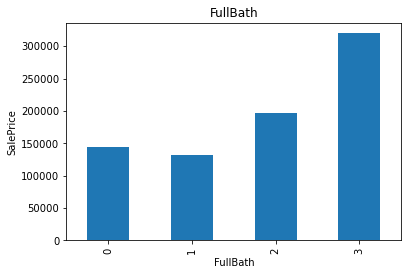

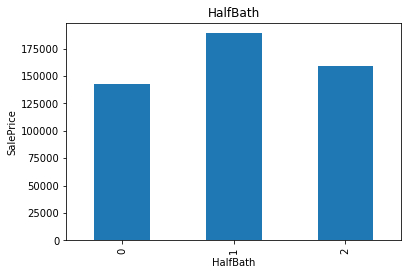

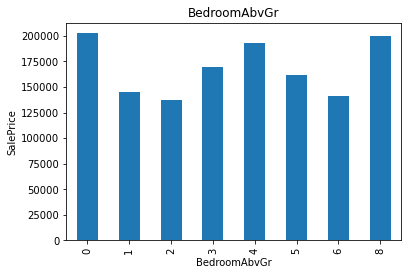

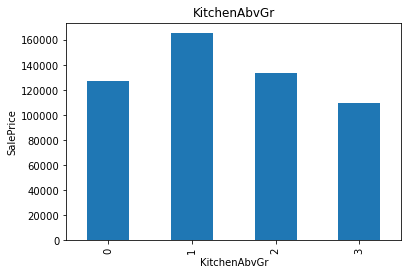

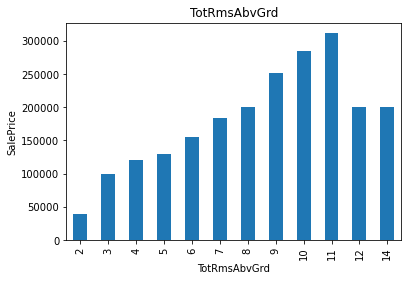

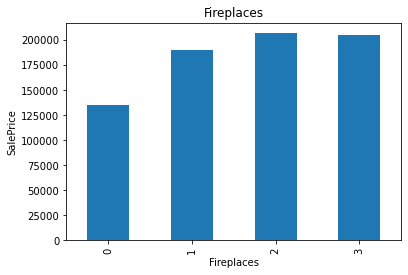

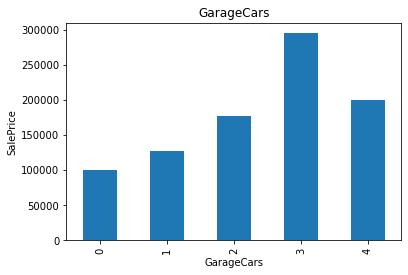

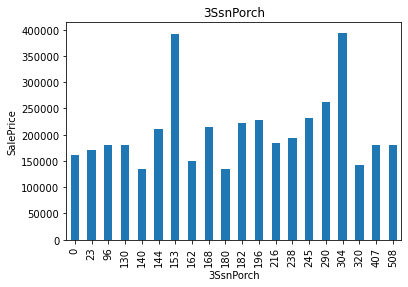

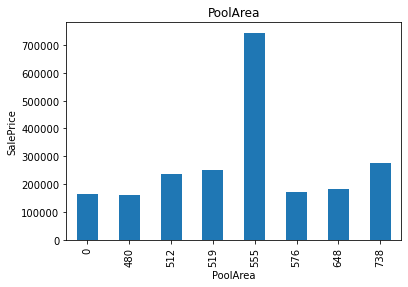

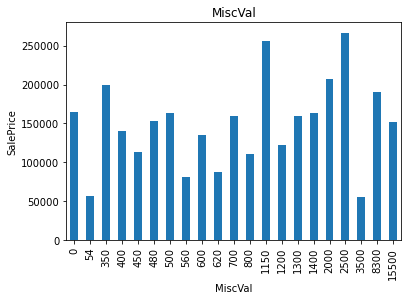

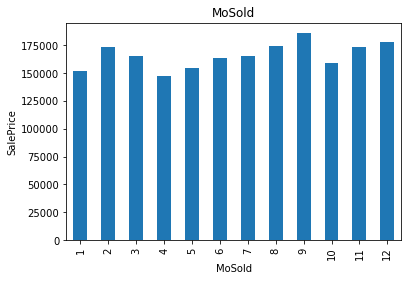

In [13]:
# Find relationship btw discrete cols and Target
for i in disc_cols:
    df1=df.copy()
#calc mean SalePrice Vs disc_cols
    df1.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

- There is a dependency between discrete_cols and SalePrice
- Overall Quality,Overall condition,full bath,TotRmsAbvGrd,Garagecars has an exponential increase for the SalePrice(better         quality higher price)

# Find Continous var

In [25]:
cont_cols=[i for i in num_cols if i not in disc_cols+year_cols+['Id']]
print("NO.of Continuous feature {}".format(len(cont_cols)))

NO.of Continuous feature 16


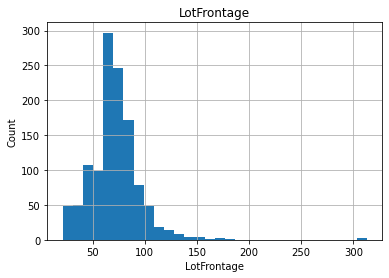

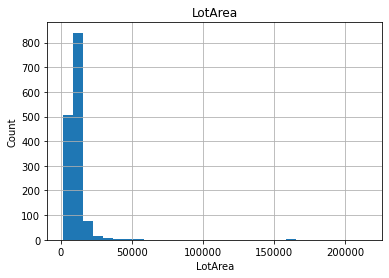

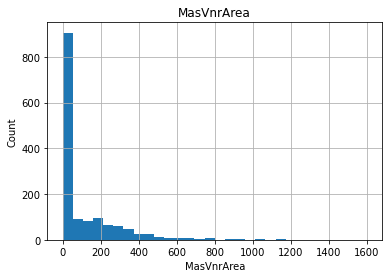

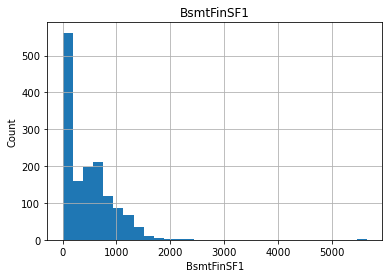

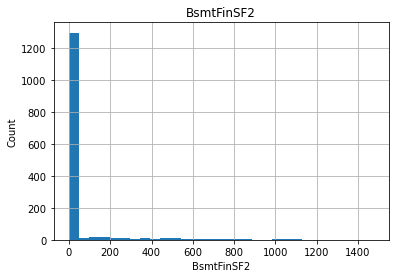

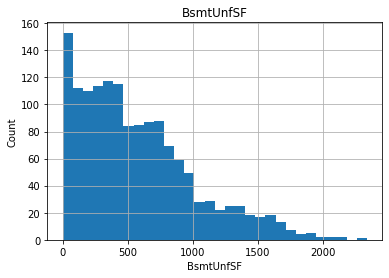

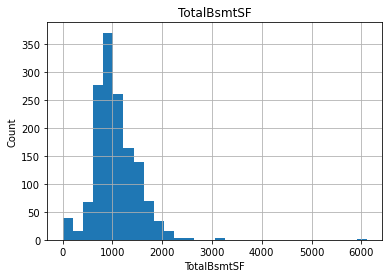

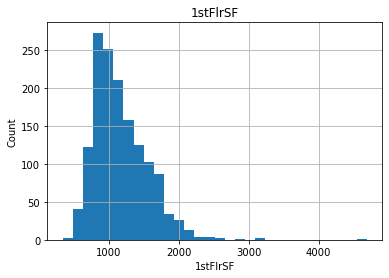

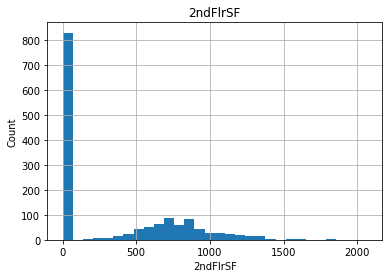

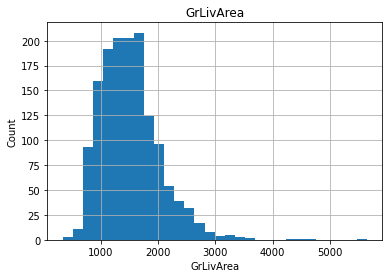

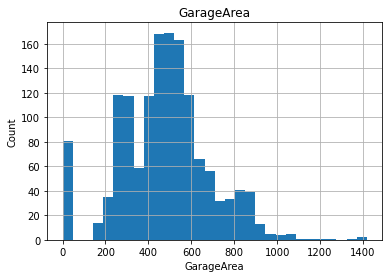

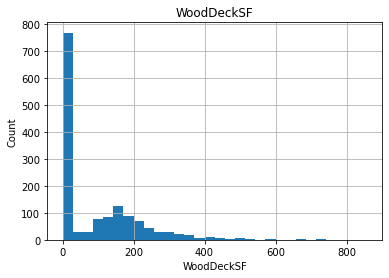

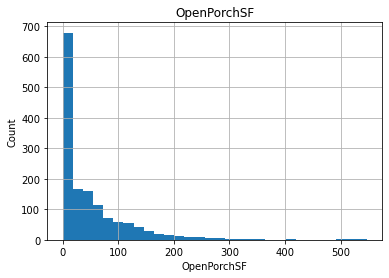

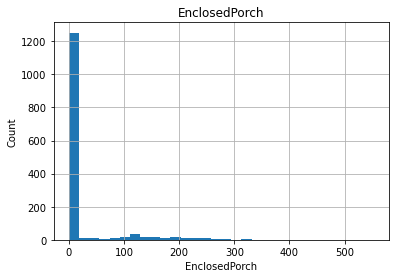

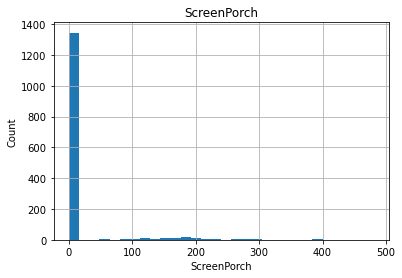

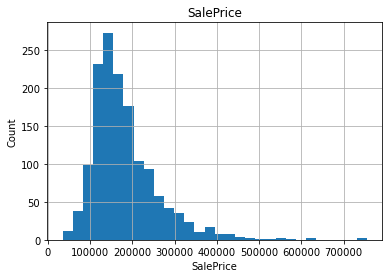

In [28]:
# create histograms to understand the continous distribution
for i in cont_cols:
    df1=df.copy()
#calc mean SalePrice Vs disc_cols
    df1[i].hist(bins=30)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

- Most of the Continous columns are Skewed so transform and check the relationship

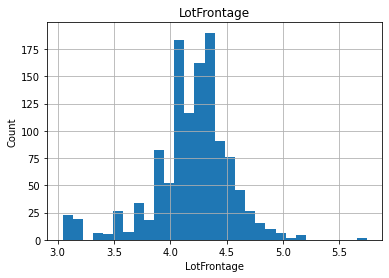

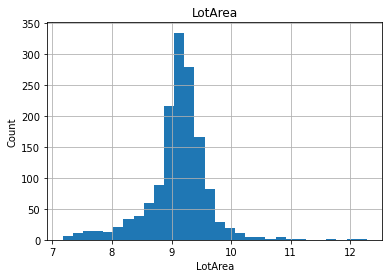

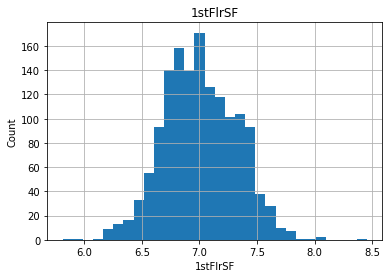

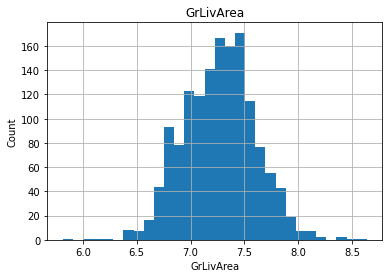

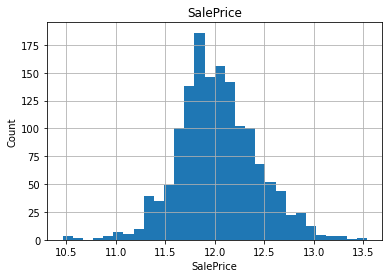

In [46]:
# After applying Log Transform:
for i in cont_cols:
    df1=df.copy()
    if 0 in df1[i].unique():
        pass
    else:
        df1[i]=np.log(df1[i])
        df1[i].hist(bins=30)
        plt.title(i)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()

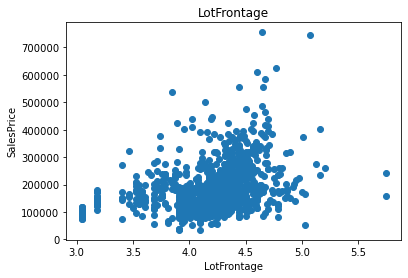

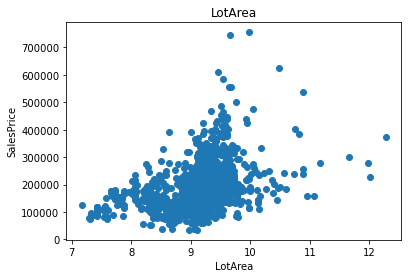

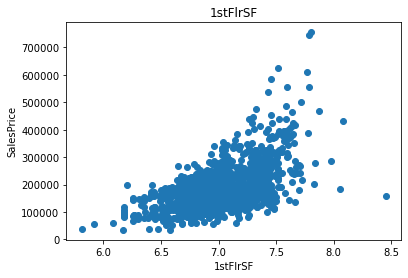

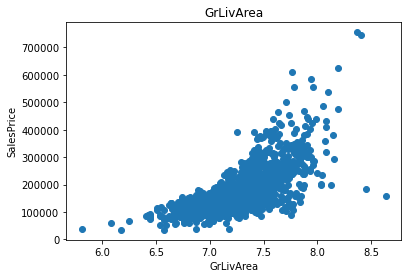

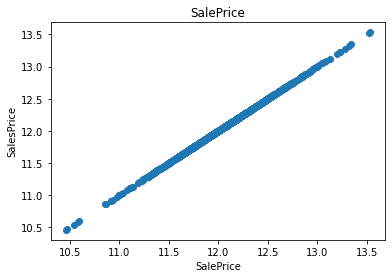

In [16]:
# Scatter plot after logarithmic transformation of cont_cols


for i in cont_cols:
    df1=df.copy()
    if 0 in df1[i].unique():
        pass
    else:
        df1[i]=np.log(df1[i])
        plt.scatter(df1[i],df1['SalePrice'])
        plt.xlabel(i)
        plt.ylabel('SalesPrice')
        plt.title(i)
        plt.show()

- Lotfrontage,LotArea,1stflrSF,GrlivArea all are positively correlated with SalePrice(target)

# Check Outliers using Boxplot

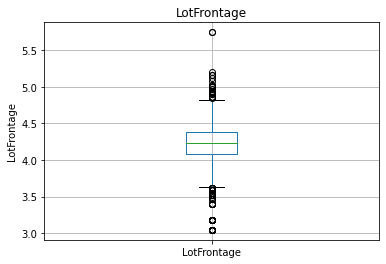

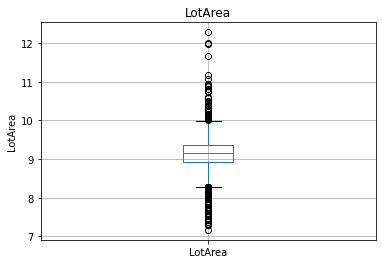

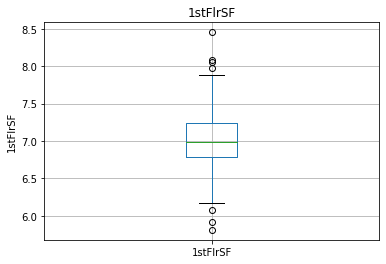

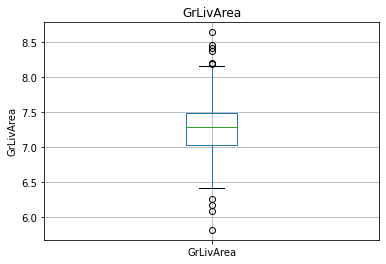

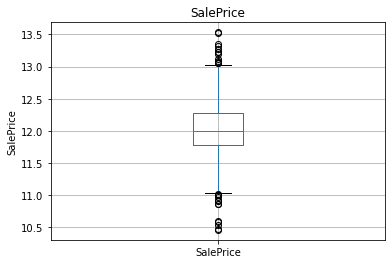

In [17]:
#works only in Continous var
for i in cont_cols:
    df1=df.copy()
    if 0 in df1[i].unique():# log(0)-undefined
        pass
    else:
        df1[i]=np.log(df1[i])
        df1.boxplot(column=i)
        plt.ylabel(i)
        plt.title(i)
        plt.show()

### - The below cols have outliers that can be treated with IQR 
- Lotfrontage
- LotArea
- 1stflrSF
- GrlivArea 

# Categorical columns

In [19]:
cat_cols=[i for i in df.columns if df[i].dtypes=='O']
print('NO of category columns: ',len(cat_cols))
print(cat_cols)

NO of category columns:  43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [20]:
df[cat_cols].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [21]:
# check the cardinality in cat_cols # cardinality-no of groups in the columns
for i in cat_cols:
    print('The Number of categories in {} are {}'.format(i,len(df[i].unique())))

The Number of categories in MSZoning are 5
The Number of categories in Street are 2
The Number of categories in Alley are 3
The Number of categories in LotShape are 4
The Number of categories in LandContour are 4
The Number of categories in Utilities are 2
The Number of categories in LotConfig are 5
The Number of categories in LandSlope are 3
The Number of categories in Neighborhood are 25
The Number of categories in Condition1 are 9
The Number of categories in Condition2 are 8
The Number of categories in BldgType are 5
The Number of categories in HouseStyle are 8
The Number of categories in RoofStyle are 6
The Number of categories in RoofMatl are 8
The Number of categories in Exterior1st are 15
The Number of categories in Exterior2nd are 16
The Number of categories in MasVnrType are 5
The Number of categories in ExterQual are 4
The Number of categories in ExterCond are 5
The Number of categories in Foundation are 6
The Number of categories in BsmtQual are 5
The Number of categories in

- Cardinality > 5 do Feature Engineering(mean encoding,create new feature) & < 5 do One hot encoding

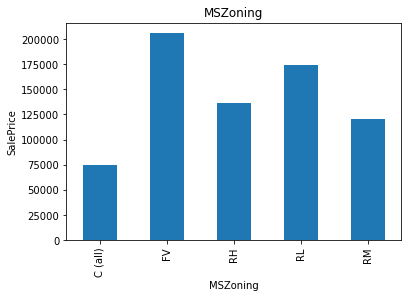

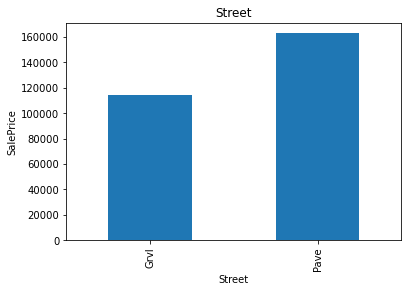

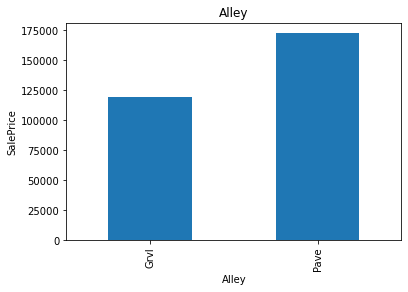

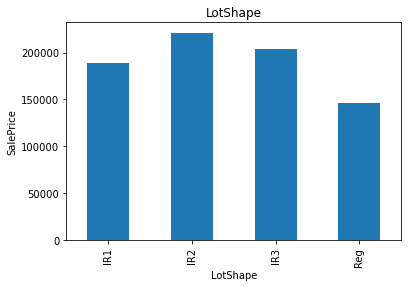

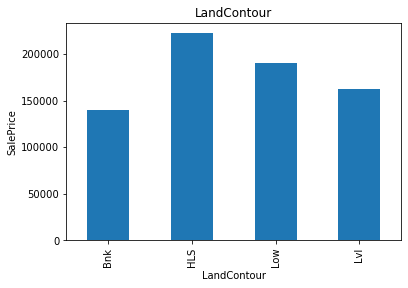

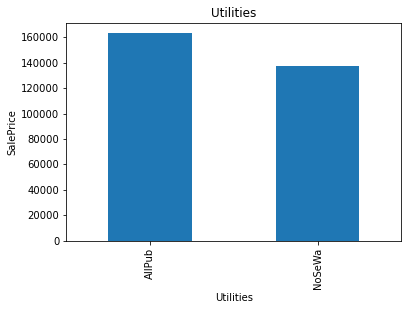

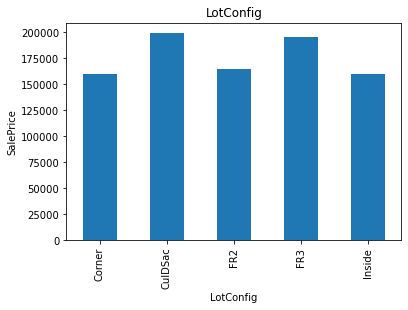

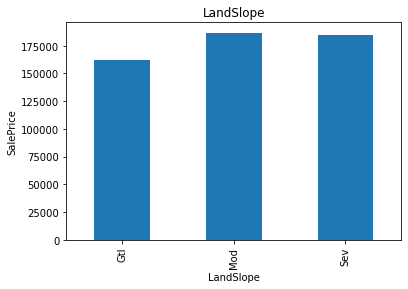

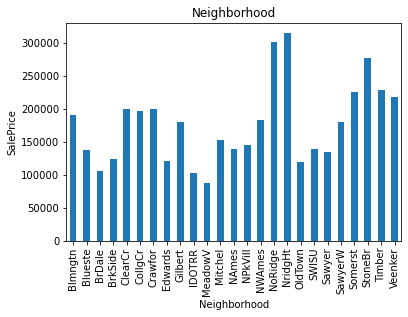

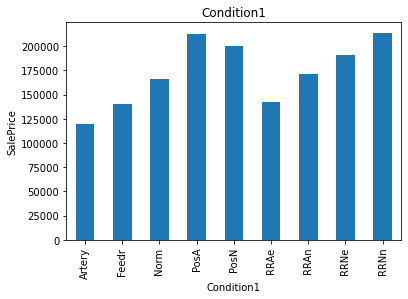

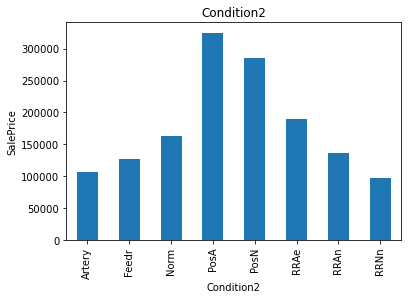

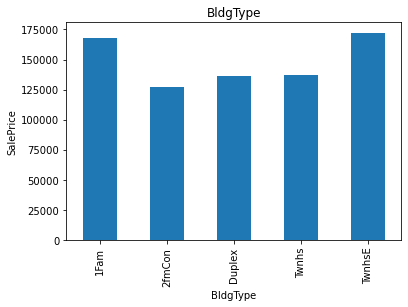

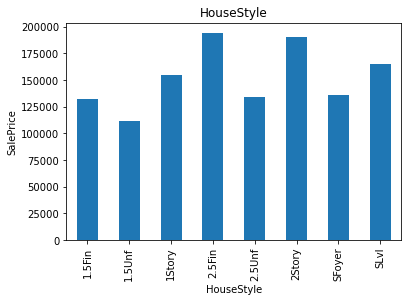

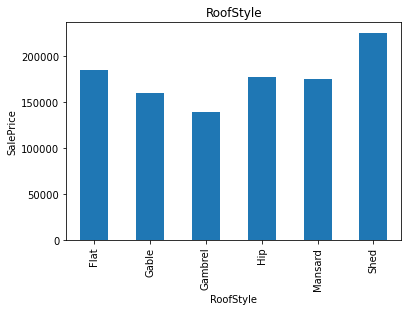

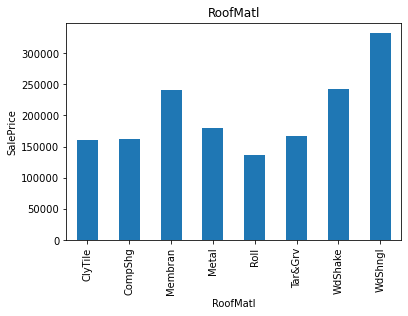

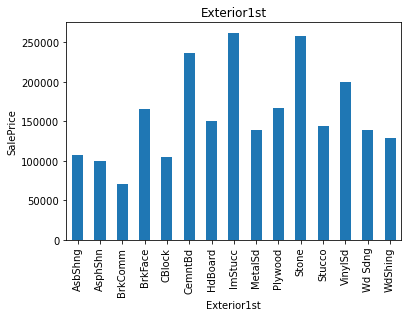

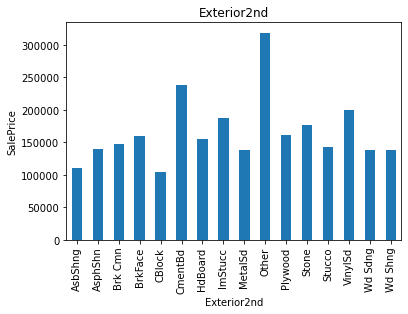

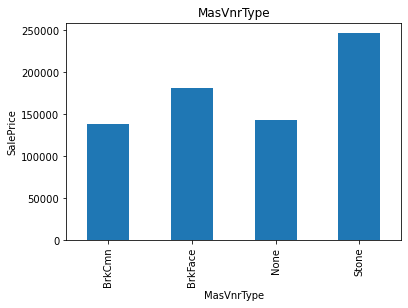

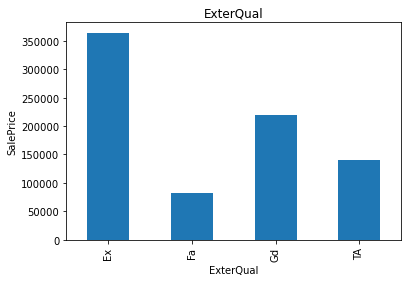

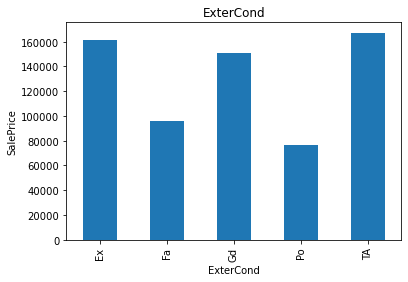

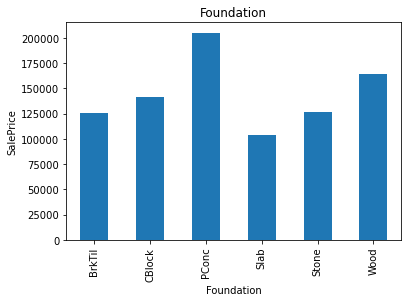

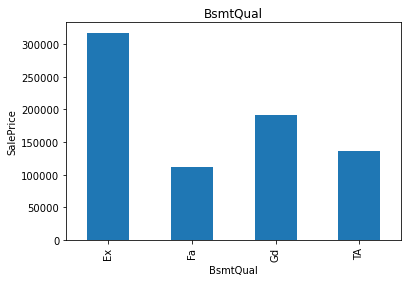

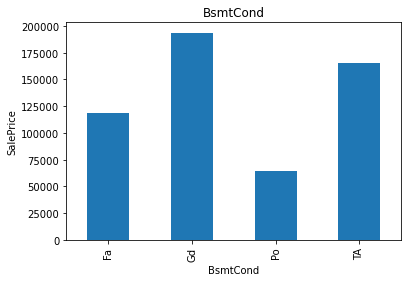

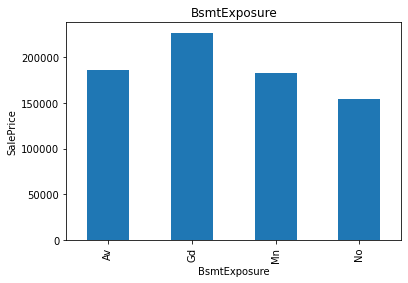

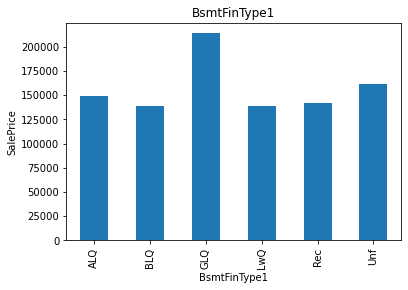

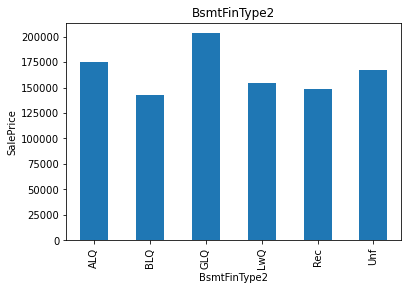

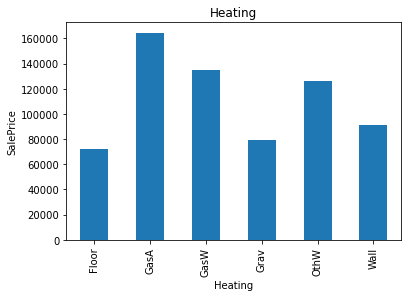

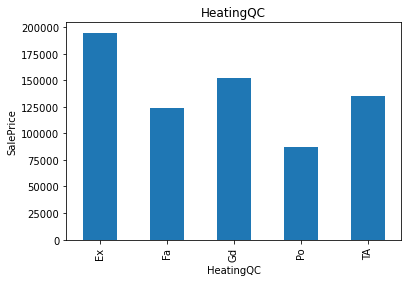

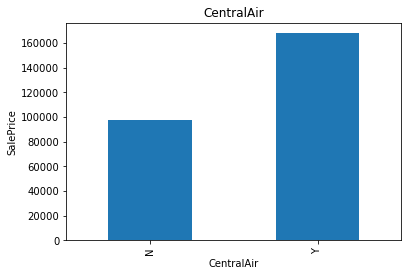

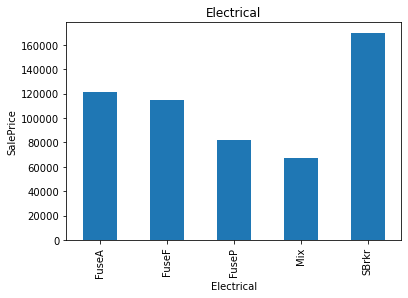

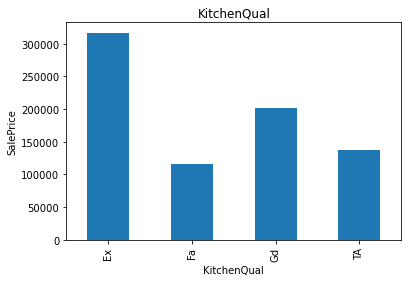

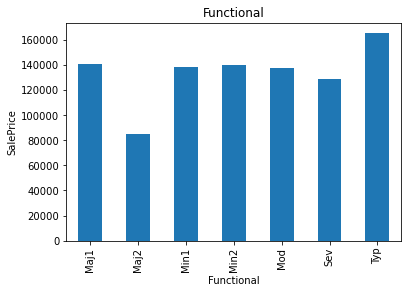

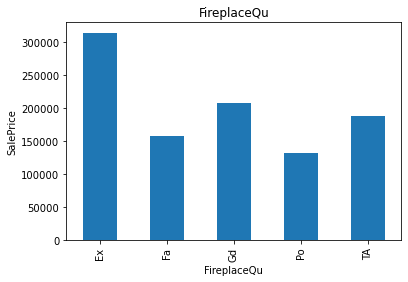

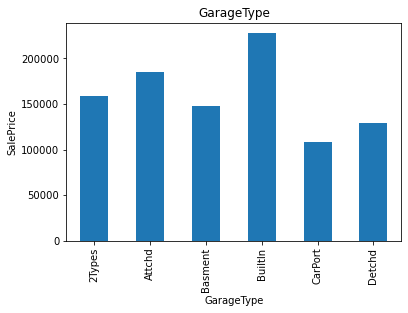

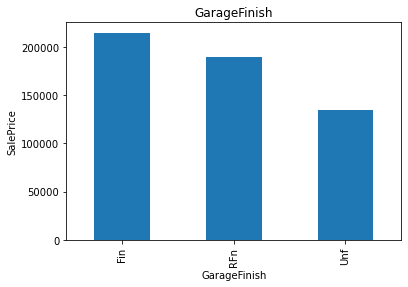

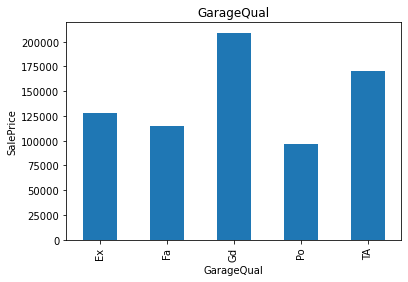

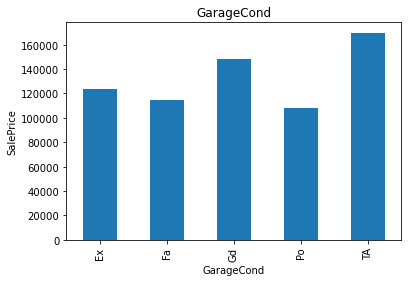

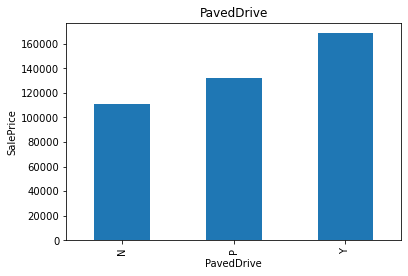

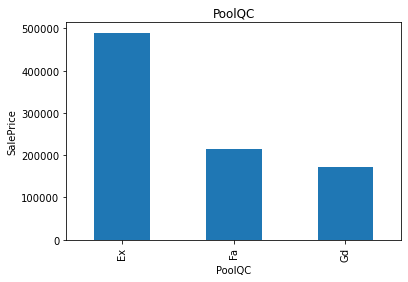

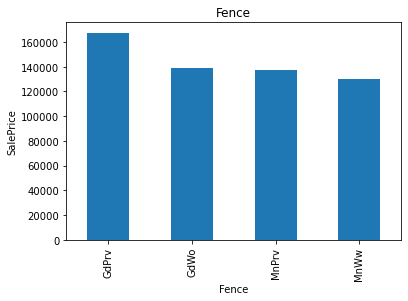

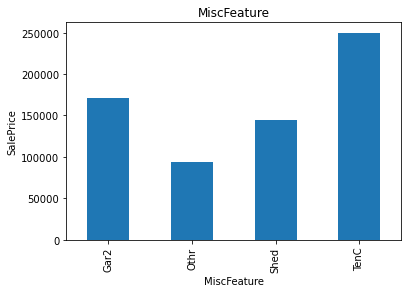

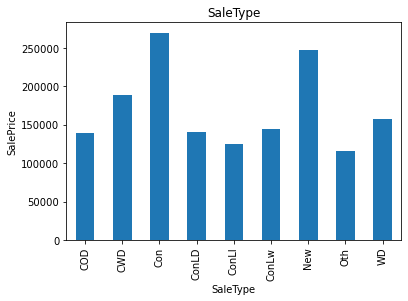

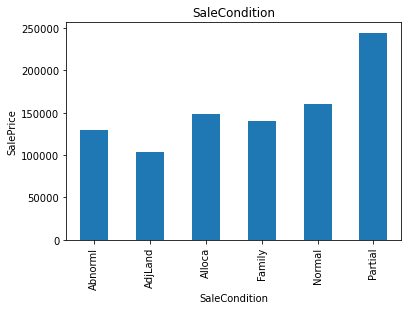

In [36]:
# relationship btw Cat_cols and Target(SalePrice)
for i in cat_cols:
    df1=df.copy()
#calc mean SalePrice Vs cat_cols
    df1.groupby(i)['SalePrice'].median().plot.bar()
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.show()

- Street--Pave has higer saleprice to grvl
- Basement,kitchen,Fireplace,Pool Quality if excellent has higher saleprice 
- centralair present attributes to higher price